
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al Aprendizaje Automatico 2022, Grupo 14**:

**Integrantes:**


*   Brunetto, Gisela
*   Luna, Andres
*   Robiglio, Guillermo
*   Garay, Alejandro




---


# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from scipy import stats

from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree







## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
url1="https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv"

In [ ]:
dataset = pd.read_csv(url1,comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#agregamos stratify=y porque las clases del target están desbalanceadas (más adelante se ve en el gráfico de barras)

In [ ]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Respuestas


## Ejercicio 1: Descripción de los Datos y la Tarea


### 1- ¿De qué se trata el conjunto de datos?

El conjunto de datos se trata de información sobre préstamos de solicitantes recientes a los que se les otorgó crédito, realizado por el departamento de créditos de un banco. 

### 2- ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?




La variable objetivo es la variable 'TARGET'. La misma tiene las siguientes asignaciones y significado:


*   1 si el cliente incumplió el pago del préstamo
*   0 si el cliente cumplió el pago del préstamo

Esta es la variable que se utilizará para realizar la predicción de calificación crediticia de un nuevo solicitante, para poder decidir si se le debe otorgar o no un crédito.



### 3- ¿Qué información (atributos) hay disponible para hacer la predicción?


In [ ]:
dataset.columns

Index(['TARGET', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

Los atributos disponibles para realizar la predicción son:

*   TARGET - Variable que indica el cumplimiento o no en el pago del préstamo.
*   LOAN - Importe solicitado en el préstamo.
*   MORTDUE - Monto adeudado sobre la hipoteca existente.
*   VALUE - Valor actual de la propiedad.
*   YOJ - Antigüedad en el trabajo actual.
*   DEROG - Número de informes despectivos importantes.
*   DELINQ - Número de líneas de crédito morosas
*   CLAGE - Antigüedad de la línea comercial más antigua en meses
*   NINQ - Número de líneas de crédito recientes
*   CLNO - Número de líneas de crédito
*   DEBTINC - Relación deuda-ingresos 


#### Visualización

Variables característica

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

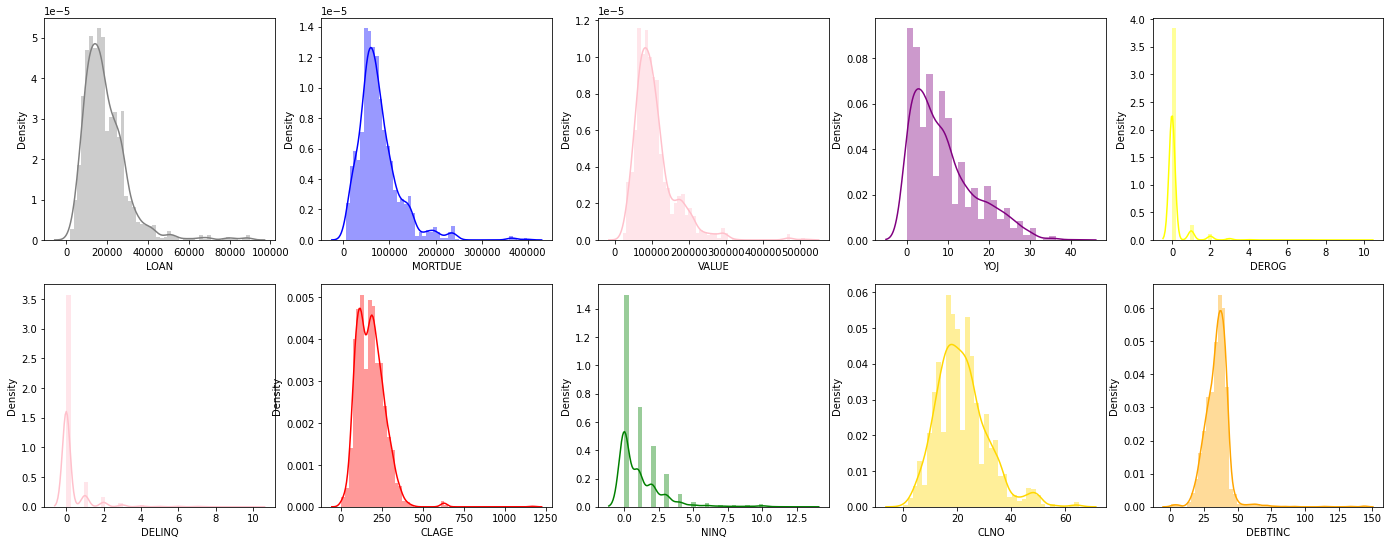

In [ ]:
f, axes = plt.subplots(2, 5, figsize=(24,9))
sns.distplot( dataset['LOAN'] , color="gray", ax=axes[0, 0])
sns.distplot( dataset['MORTDUE'] , color="blue", ax=axes[0, 1])
sns.distplot( dataset['VALUE'] , color="pink", ax=axes[0, 2])
sns.distplot( dataset['YOJ'] , color="purple", ax=axes[0, 3])
sns.distplot( dataset['DEROG'] , color="yellow", ax=axes[0, 4])
sns.distplot( dataset['DELINQ'] , color="pink", ax=axes[1, 0])
sns.distplot( dataset['CLAGE'] , color="red", ax=axes[1, 1])
sns.distplot( dataset['NINQ'] , color="green", ax=axes[1, 2])
sns.distplot( dataset['CLNO'] , color="gold", ax=axes[1, 3])
sns.distplot( dataset['DEBTINC'] , color="orange", ax=axes[1, 4])

Variable objetivo: TARGET

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]), <a list of 10 Text major ticklabel objects>)

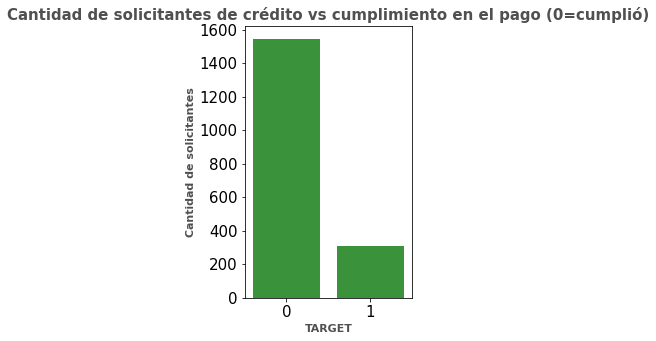

In [ ]:
fig = plt.figure(figsize=(3,5))
sns.countplot(data=dataset, x='TARGET', color='tab:green')

plt.title('Cantidad de solicitantes de crédito vs cumplimiento en el pago (0=cumplió)', 
            loc='center', color='#505050', fontsize=15, fontweight='bold')

plt.ylabel("Cantidad de solicitantes", size=11, fontweight='bold', color='#505050')
plt.xlabel("TARGET", size=11, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

Diagramas de caja de variables característica vs TARGET

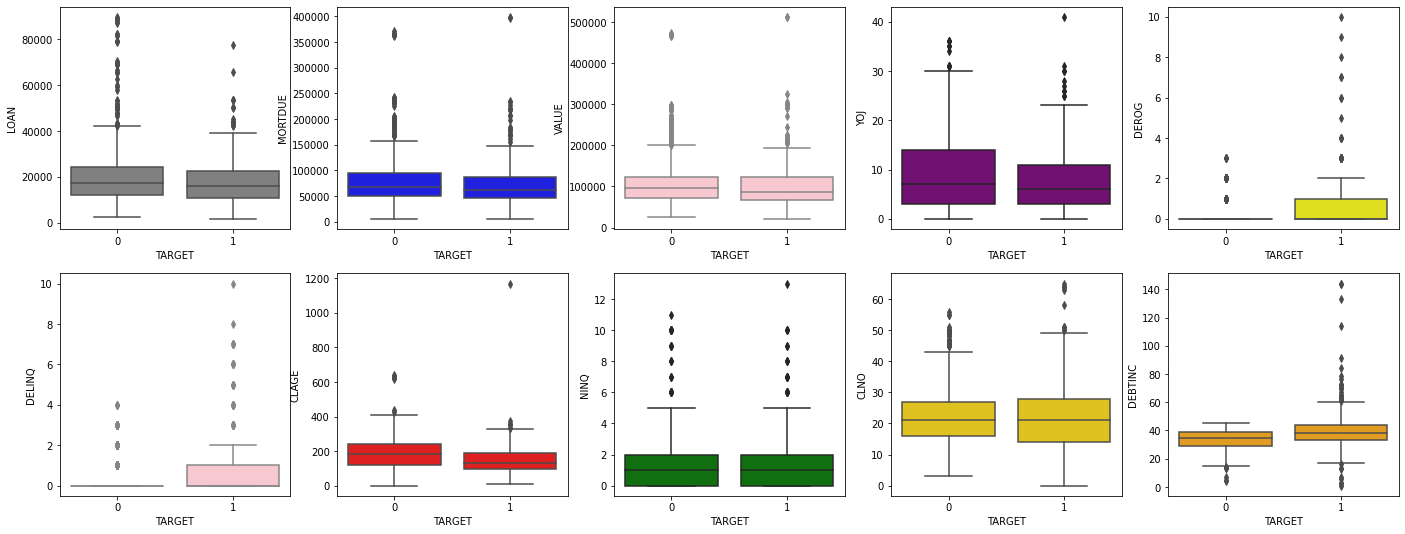

In [ ]:
f, axes = plt.subplots(2, 5, figsize=(24,9))
sns.boxplot(x = 'TARGET', y = 'LOAN', data = dataset , color="gray", ax=axes[0, 0])
sns.boxplot(x = 'TARGET', y = 'MORTDUE', data = dataset , color="blue", ax=axes[0, 1])
sns.boxplot(x = 'TARGET', y = 'VALUE', data = dataset , color="pink", ax=axes[0, 2])
sns.boxplot(x = 'TARGET', y = 'YOJ', data = dataset , color="purple", ax=axes[0, 3])
sns.boxplot(x = 'TARGET', y = 'DEROG', data = dataset , color="yellow", ax=axes[0, 4])
sns.boxplot(x = 'TARGET', y = 'DELINQ', data = dataset , color="pink", ax=axes[1, 0])
sns.boxplot(x = 'TARGET', y = 'CLAGE', data = dataset , color="red", ax=axes[1, 1])
sns.boxplot(x = 'TARGET', y = 'NINQ', data = dataset , color="green", ax=axes[1, 2])
sns.boxplot(x = 'TARGET', y = 'CLNO', data = dataset , color="gold", ax=axes[1, 3])
sns.boxplot(x = 'TARGET', y = 'DEBTINC', data = dataset , color="orange", ax=axes[1, 4])

### 4- ¿Qué atributos imagina ud. que son los más determinantes para la predicción?


Para establecer qué atributos son los mas determinantes para la predicción, se realiza matriz de correlación.


Text(0.5, 1.0, 'Matriz de correlación de las variables')

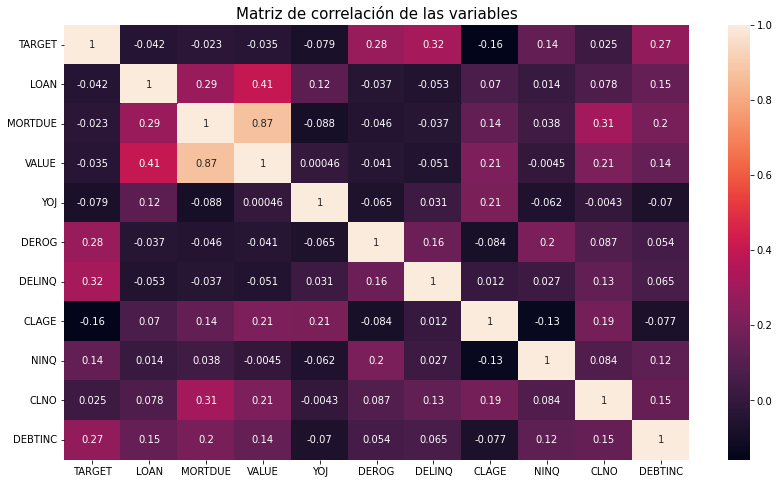

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(dataset[dataset.columns].corr(),annot=True, fmt='.2g')
plt.title('Matriz de correlación de las variables', fontsize=15)

En la primer columna de la matriz, se observa que los atributos que pueden ser mas determinantes para la predicción, son:

*   DEROG - número de informes despectivos importantes.
*   DELINQ - número de líneas de crédito morosas
*   CLAGE - Antigüedad de la línea comercial más antigua en meses
*   NINQ - Número de líneas de crédito recientes
*   DEBTINC - Relación deuda-ingresos 


## Ejercicio 2: Predicción con Modelos Lineales

### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto



**Entrenamiento del modelo**

In [ ]:
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
model1=Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(random_state=42))])

model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model', SGDClassifier(random_state=42))])

Predicción de valores de entrenamiento:

In [ ]:
ypredtrain = model1.predict(X_train)

Predicción para los valores de evaluación:

In [ ]:
ypred = model1.predict(X_test)

**Reporte de métricas para train y test:**

In [ ]:
print(f'Reporte de métricas de entrenamiento\n------------------------------------------------------')
print(classification_report(y_train, ypredtrain))
print(f'Reporte de métricas de evaluación\n-------------------------------------------------------')
print(classification_report(y_test, ypred))

Reporte de métricas de entrenamiento
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1236
           1       0.68      0.30      0.42       247

    accuracy                           0.86      1483
   macro avg       0.78      0.64      0.67      1483
weighted avg       0.84      0.86      0.84      1483

Reporte de métricas de evaluación
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       309
           1       0.89      0.27      0.42        62

    accuracy                           0.87       371
   macro avg       0.88      0.63      0.67       371
weighted avg       0.88      0.87      0.84       371



**Matriz de confusión**

1) Para la instancia de entrenamiento

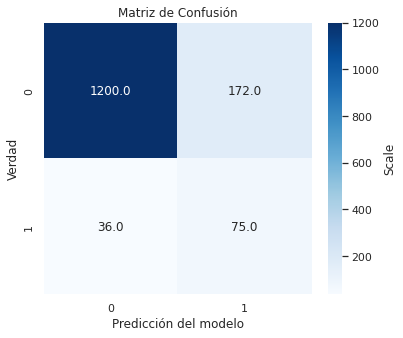

In [ ]:
cm = confusion_matrix(y_train, ypredtrain)

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Matriz de Confusión" )

labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Verdad", xlabel="Predicción del modelo")

plt.show()

2) Para la instancia de evaluación

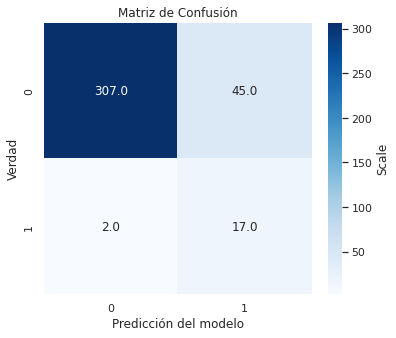

In [ ]:
cm1 = confusion_matrix(y_test, ypred)

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Matriz de Confusión" )

labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm1.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Verdad", xlabel="Predicción del modelo")

plt.show()

### Ejercicio 2.2: Ajuste de Hiperparámetros

Selección de valores para los hiperparámetros principales del SGDClassifier. 

Se visualizan los parametros del modelo:

In [ ]:
model.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
model.max_iter = 3000
model.loss_functions

{'epsilon_insensitive': (sklearn.linear_model._sgd_fast.EpsilonInsensitive,
  0.1),
 'hinge': (sklearn.linear_model._sgd_fast.Hinge, 1.0),
 'huber': (sklearn.linear_model._sgd_fast.Huber, 0.1),
 'log': (sklearn.linear_model._sgd_fast.Log,),
 'modified_huber': (sklearn.linear_model._sgd_fast.ModifiedHuber,),
 'perceptron': (sklearn.linear_model._sgd_fast.Hinge, 0.0),
 'squared_epsilon_insensitive': (sklearn.linear_model._sgd_fast.SquaredEpsilonInsensitive,
  0.1),
 'squared_error': (sklearn.linear_model._sgd_fast.SquaredLoss,),
 'squared_hinge': (sklearn.linear_model._sgd_fast.SquaredHinge, 1.0),
 'squared_loss': (sklearn.linear_model._sgd_fast.SquaredLoss,)}

Definición de parametros a comparar para encontar el mejor modelo

In [ ]:

param_grid = {
    'model__loss': ['hinge', 'log', 'squared_error', 'squared_hinge'],
    'model__learning_rate':['constant', 'optimal','adaptive'],
    'model__alpha': [0.0, 0.001, 0.0001, 0.00001, 1.0, 10.0],
     }

In [ ]:
model = Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(random_state=42, eta0=0.1))])

cv = GridSearchCV(model, param_grid, scoring ='accuracy', refit=True, cv=5)
cv.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/pyt

In [ ]:
results = cv.cv_results_

data_sdg_classifier=pd.DataFrame(results)
data_sdg_classifier.sort_values('rank_test_score')[:6]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__learning_rate,param_model__loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.022153,0.006277,0.005179,0.002916,0.001,optimal,log,"{'model__alpha': 0.001, 'model__learning_rate'...",0.878788,0.872054,0.865320,0.858108,0.895270,0.873908,0.012704,1
20,0.014106,0.000959,0.004396,0.001662,0.001,adaptive,hinge,"{'model__alpha': 0.001, 'model__learning_rate'...",0.868687,0.868687,0.865320,0.864865,0.891892,0.871890,0.010130,2
44,0.017187,0.003812,0.003666,0.000502,0.00001,adaptive,hinge,"{'model__alpha': 1e-05, 'model__learning_rate'...",0.868687,0.868687,0.865320,0.864865,0.891892,0.871890,0.010130,2
32,0.014427,0.001898,0.006501,0.003737,0.0001,adaptive,hinge,"{'model__alpha': 0.0001, 'model__learning_rate...",0.868687,0.868687,0.865320,0.864865,0.891892,0.871890,0.010130,2
8,0.009923,0.001390,0.002292,0.000067,0.0,adaptive,hinge,"{'model__alpha': 0.0, 'model__learning_rate': ...",0.868687,0.868687,0.865320,0.864865,0.891892,0.871890,0.010130,2
33,0.028675,0.005540,0.004081,0.000855,0.0001,adaptive,log,"{'model__alpha': 0.0001, 'model__learning_rate...",0.872054,0.858586,0.872054,0.861486,0.891892,0.871214,0.011688,6


In [ ]:
data_sdg_classifier[['param_model__learning_rate','param_model__loss','param_model__alpha','mean_test_score','std_test_score','rank_test_score']].sort_values(by='rank_test_score', ascending=True).head(5)

,param_model__learning_rate,param_model__loss,param_model__alpha,mean_test_score,std_test_score,rank_test_score
17,optimal,log,0.001,0.873908,0.012704,1
20,adaptive,hinge,0.001,0.871890,0.010130,2
44,adaptive,hinge,0.00001,0.871890,0.010130,2
32,adaptive,hinge,0.0001,0.871890,0.010130,2
8,adaptive,hinge,0.0,0.871890,0.010130,2


Como se puede observar en la grilla, los hiperparámetros mejor rankeados son:
* $\alpha=0.001$
* $\eta$= optimal
* loss = log

El accuracy promedio resultante de realizar las 5 capas en la validación cruzada es $0.873908$ con una desviasión estándar de $0.012704$.

**Seleccion del mejor modelo**

In [ ]:
best_model = cv.best_estimator_
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model',
                 SGDClassifier(alpha=0.001, eta0=0.1, loss='log',
                               random_state=42))])

**Entrenamiento del mejor modelo**

In [ ]:
#BM = Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(alpha=0.001, loss='log', max_iter=3000, random_state=42, eta0=0.1, learning_rate='optimal', penalty='l2'))])
best_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model',
                 SGDClassifier(alpha=0.001, eta0=0.1, loss='log',
                               random_state=42))])

Predicción de valores de entrenamiento

In [ ]:
ypredtrain_bm = best_model.predict(X_train)

Predicción de valores de evaluación

In [ ]:
ypred_bm = best_model.predict(X_test)

**Reporte de métricas para el mejor modelo**

In [ ]:
print(f'Reporte de métricas de entrenamiento\n------------------------------------------------------')
print(classification_report(y_train, ypredtrain_bm))
print(f'Reporte de métricas de evaluación\n-------------------------------------------------------')
print(classification_report(y_test, ypred_bm))

Reporte de métricas de entrenamiento
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1236
           1       0.80      0.30      0.44       247

    accuracy                           0.87      1483
   macro avg       0.84      0.64      0.68      1483
weighted avg       0.86      0.87      0.85      1483

Reporte de métricas de evaluación
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       309
           1       0.88      0.34      0.49        62

    accuracy                           0.88       371
   macro avg       0.88      0.66      0.71       371
weighted avg       0.88      0.88      0.86       371



**Matriz de confusión**

1) Para la instancia de entrenamiento

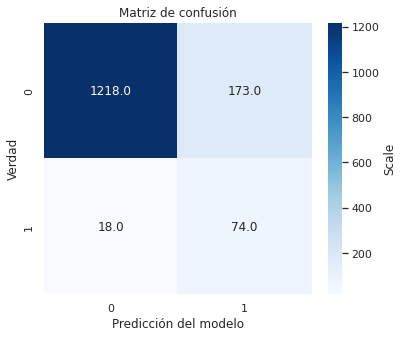

In [ ]:
cm_bm = confusion_matrix(y_train, ypredtrain_bm)

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Matriz de confusión" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm_bm.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel='Verdad', xlabel="Predicción del modelo")

plt.show()

2) Para la instancia de evaluación

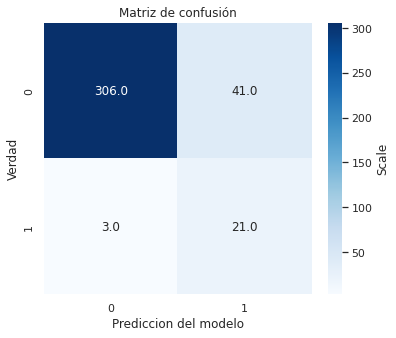

In [ ]:
from sklearn.metrics import confusion_matrix
cm1_bm = confusion_matrix(y_test, ypred_bm)

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Matriz de confusión" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm1_bm.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Verdad", xlabel="Prediccion del modelo")

plt.show()

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Predicción de valores de entrenamiento:

In [ ]:
y_train_pred = tree_model.predict(X_train)


Predicción de valores de evaluación:

In [ ]:
y_test_pred = tree_model.predict(X_test)

**Reporte de métricas**

In [ ]:
print(f'Reporte de métricas de entrenamiento\n------------------------------------------------------')
print(classification_report(y_train, y_train_pred))
print(f'Reporte de métricas de evaluación\n-------------------------------------------------------')
print(classification_report(y_test, y_test_pred))

Reporte de métricas de entrenamiento
------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00       247

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483

Reporte de métricas de evaluación
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       309
           1       0.65      0.58      0.62        62

    accuracy                           0.88       371
   macro avg       0.79      0.76      0.77       371
weighted avg       0.87      0.88      0.88       371



**Matriz de confusión**

1)  Para el conjunto de entrenamiento

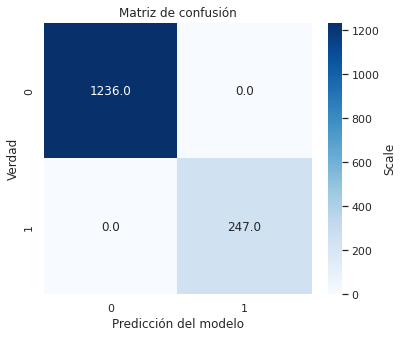

In [ ]:
cm2=confusion_matrix(y_train, y_train_pred)

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Matriz de confusión" )

labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm2.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Verdad", xlabel="Predicción del modelo")

plt.show()

2) Para el conjunto de evaluación

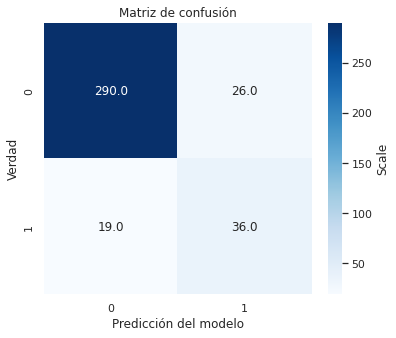

In [ ]:
cm3=confusion_matrix(y_test, y_test_pred)

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Matriz de confusión" )

labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm3.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Verdad", xlabel="Predicción del modelo")

plt.show()

### Ejercicio 3.2: Ajuste de Hiperparámetros

Creamos un diccionario con los distintos hiperpárametros que deseamos optimizar y los valores que queremos combinar en la grilla.

In [ ]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(1, 15, 1),
    'min_samples_split': range(1, 15, 1),
    'min_samples_leaf': range(1, 15, 1)
    }

Utlizamos GridSearchCV para encontrar la mejor combinación de hiperparámetros.

In [ ]:
clf_GS = GridSearchCV(tree_model, parameters, scoring="accuracy", cv=5)
clf_GS.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15680 fits failed out of a total of 41160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2940 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(1, 15)},
             scoring='accuracy')

In [ ]:
results = clf_GS.cv_results_
df = pd.DataFrame(results)
df[[ 'param_criterion','param_max_depth','param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 
    'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score', ascending=True).head(10)

,param_criterion,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
4540,entropy,10,5,3,0.886036,0.011228,1
4539,entropy,10,4,3,0.886036,0.011228,1
4538,entropy,10,3,3,0.886036,0.011228,1
4537,entropy,10,2,3,0.886036,0.011228,1
4541,entropy,10,6,3,0.886036,0.011228,1
1609,gini,9,14,3,0.886036,0.013924,1
4330,entropy,9,5,2,0.885365,0.007727,7
4327,entropy,9,2,2,0.884694,0.006864,8
4328,entropy,9,3,2,0.884694,0.006864,8
4329,entropy,9,4,2,0.884694,0.006864,8


In [ ]:
best_model_2 = clf_GS.best_estimator_
best_model_2

DecisionTreeClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=14,
                       random_state=0)

Predicción de valores de entrenamiento para el mejor modelo

In [ ]:
ypredtrain_bm_2= best_model_2.predict(X_train)


Predicción de valores de evaluación para el mejor modelo

In [ ]:
ypred_bm_2 = best_model_2.predict(X_test)

**Reporte de métricas**

In [ ]:
print(f'Reporte de métricas de entrenamiento\n------------------------------------------------------')
print(classification_report(y_train, ypredtrain_bm_2))
print(f'Reporte de métricas de evaluación\n-------------------------------------------------------')
print(classification_report(y_test, ypred_bm_2))

Reporte de métricas de entrenamiento
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1236
           1       0.91      0.67      0.77       247

    accuracy                           0.93      1483
   macro avg       0.92      0.83      0.87      1483
weighted avg       0.93      0.93      0.93      1483

Reporte de métricas de evaluación
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       309
           1       0.84      0.52      0.64        62

    accuracy                           0.90       371
   macro avg       0.88      0.75      0.79       371
weighted avg       0.90      0.90      0.89       371



**Matriz de confusión**

1) Para el conjunto de entrenamiento

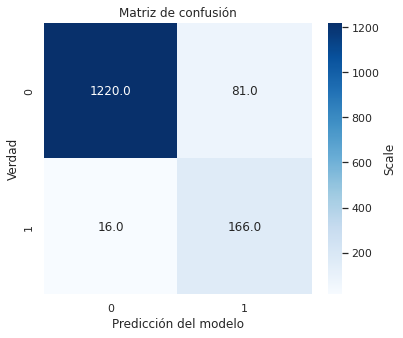

In [ ]:
cm4=confusion_matrix(y_train,ypredtrain_bm_2)

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Matriz de confusión" )

labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm4.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Verdad", xlabel="Predicción del modelo")

plt.show()

2) Para el conjunto de evaluación

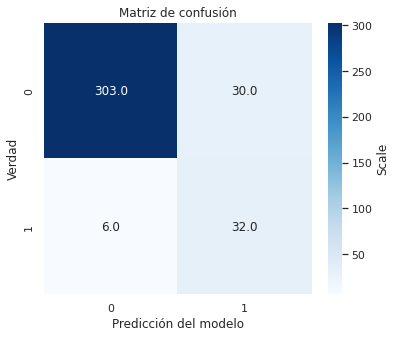

In [ ]:
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test, ypred_bm_2)

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Matriz de confusión" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm6.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Verdad", xlabel="Predicción del modelo")

plt.show()